
# Analysis on data from my research 

This notebook analyzes the trend in extreme rainfall (RX1DAY) from BR-DWGD, regridded to the ECMWF IFS CY45R1 forecast model grid.  
The BR-DWGD dataset is used as observational input for the event attribution study (EEA) of the extreme rainfall episode that occurred in São Sebastião (São Paulo, Brazil). 
The dataset is already processed into the RX1DAY metric and regridded to the study area, which is shown in the location map below:


![Location map](https://raw.githubusercontent.com/Rafaelaqv/images/refs/heads/main/mapa_localizacao.png)







**Goal:**
Evaluate whether RX1DAY shows a linear trend over time (1961–2023).
**Data:**
BR-DWGD (in situ precipitation data, coverage: Brazil).  
**Method:**
* Plop times series
* scatter plot
* Linear regression and slope interpretation (mm/decade)

In [ ]:
""" Import libraries. """
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:

# Load the BR-DWGD data 
xavier_data = r"C:\Users\rafaq\OneDrive\Documentos\oxford\DATAS\rx1day_series_xavier_table.csv"

df = pd.read_csv(xavier_data)

# Preview the data
print(df.head())

   year          pr
0  1961  135.135960
1  1962  204.571673
2  1963  127.555162
3  1964   79.982910
4  1965   89.596240


In [ ]:
# Convert to numeric types
df['year'] = df['year'].astype(int)
df['pr'] = pd.to_numeric(df['pr'], errors='coerce')

# Drop the year 2024
df = df[df['year'] != 2024]

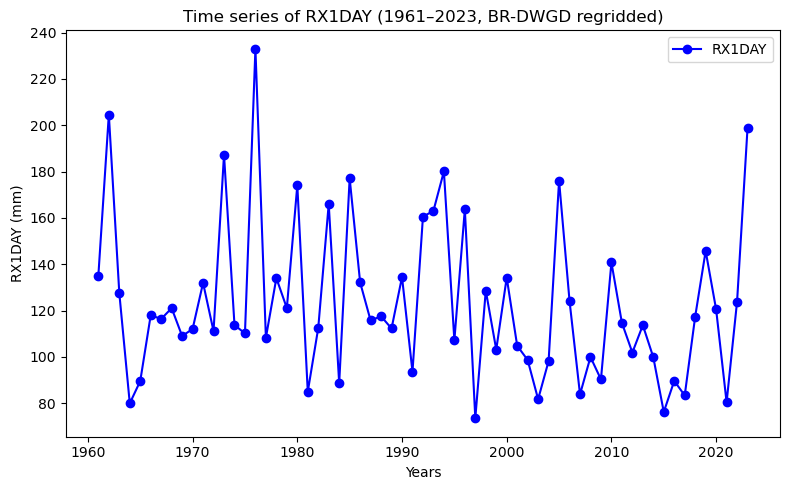

In [ ]:
"""Times Series of Precipitation (RX1DAY)"""
# Time series plot 
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df['year'], df['pr'], marker='o', linestyle='-', color='blue', label="RX1DAY")
ax.set_xlabel("Years")
ax.set_ylabel("RX1DAY (mm)")
ax.set_title("Time series of RX1DAY (1961–2023, BR-DWGD regridded)")
ax.legend()
plt.tight_layout()
plt.show()

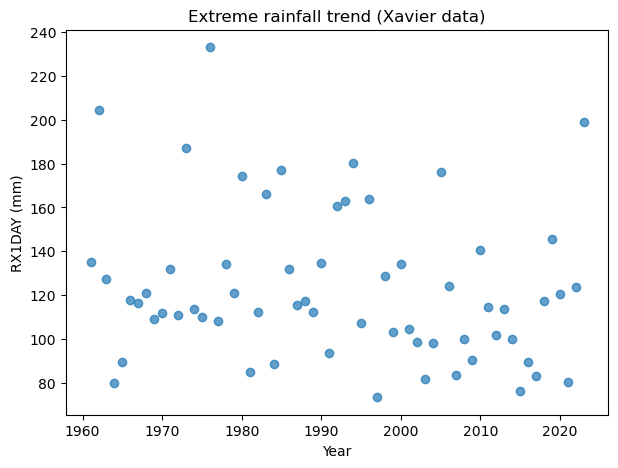

In [ ]:
""" Scatter plot - Times series """
#  Scatter plot 
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(df['year'], df['pr'], alpha=0.7)
ax.set_xlabel("Years")
ax.set_ylabel("RX1DAY (mm)")
ax.set_title("Extreme rainfall trend (Xavier data)")
plt.show()

In [ ]:
""" Linear regression - Times series """

#  Linear regression using scipy 
result = scipy.stats.linregress(df['year'], df['pr'])
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
p_value = result.pvalue

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4f}")

Slope: -0.3448
Intercept: 809.8411
R-squared: 0.034
P-value: 0.1496


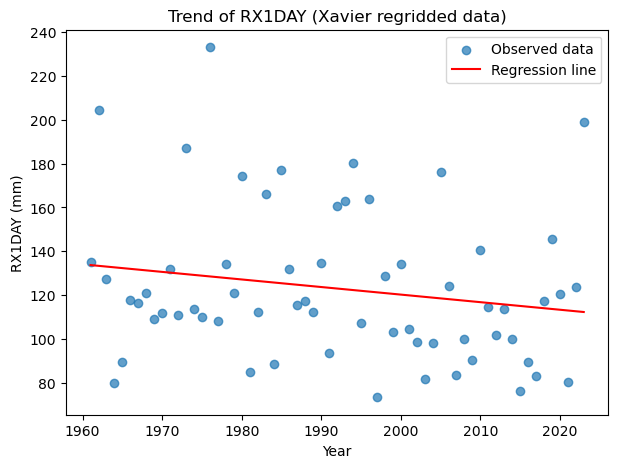

In [ ]:
""" Linear regression - plot """

#  Plot with regression line 
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(df['year'], df['pr'], alpha=0.7, label="Observed data")
ax.plot(df['year'], intercept + slope*df['year'], color="red", label="Regression line")
ax.set_xlabel("Year")
ax.set_ylabel("RX1DAY (mm)")
ax.set_title("Trend of RX1DAY (Xavier regridded data)")
ax.legend()
plt.show()